# Assignment 2 - Machine Learning Basics

## Varun Shankar
Netid:  vjs7

## Learning Objectives:
1. Be able to apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
2. Understand the bias-variance tradeoff and how adjusting model flexibility impacts model selection and the training process

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

**(a)** The sample size $n$ is extremely large, and the number of predictors $p$ is small.

**(b)** The number of predictors $p$ is extremely large, and the number of observations $n$ is small.

**(c)** The relationship between the predictors and response is highly non-linear.

**(d)** The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

**(a)** Flexible would be better. The large number of observations would allow the flexible approach to more closely match the underlying relationship.

**(b)** Inflexible would be better. Since there are not too many observations and there are a large number of influencing predictors, a flexible approach could easily lead to overfit or find patterns in the irreducible error.

**(c)** Flexible would be better. Since we know the relationship is non-linear, an inflexible approach would not capture this relationship as well.

**(d)** Inflexible would be better. A flexible approach may overfit the data due to the high variance of the data. 

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**

**(a)** This is a regression problem since CEO salary, our response, is numerical. We are interested in inference because we want to understand how the factors or predictors affect salary. Sample size $n$ is 500, for the 500 firms, and predictors $p$ is 3, for profit, number of employees, and industry.

**(b)** This is a classification problem since we just want to know if the product will be successful or not. This is a prediction problem since we are not interested in how the predictors affect the response. The sample size is 20 and predictors is 13, for price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** This is a regression problem because the response is % change in USD. We are again simply interested in prediction, and not how the factors affect the response. The sample size is 52, for the weekly data in a year. The number of predictors is 3 for the change in US, British, and German markets.

# Practical Questions

## 3
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A1_X_train_low.csv`, which lets you know whether the file contains features, $X$, or targets, $y$; training or testing data; and is from the low or high dimensional dataset.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

In [136]:
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.neighbors import KNeighborsClassifier
import time

# (a) Write your own kNN classifier

class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        # Initialize class properties xtrain and ytrain
        self.xtrain = []
        self.ytrain = []
        
    def fit(self, x, y):
        # Save the training data to properties of this class
        self.xtrain = x
        self.ytrain = y
        
    def predict(self, x, k):
        y_hat = [] # Variable to store the estimated class label for 
        # Calculate the distance from each vector in x to the training data
        for i in range(len(x)): # For each x in the set of test data
            # Calculate a list of Euclidian distances from the selected test x to each x in the training set
            dist = np.sqrt(np.sum(np.power(self.xtrain-x.iloc[i,:],2), axis=1))
            # Find the k smallest distances, and select the indexes
            kindex = dist.nsmallest(k).index.tolist()
            # Append the y_hat var with the mode of the set of k ytrain vars
            y_hat.append(self.ytrain.iloc[kindex].mode().mean().as_matrix()[0])
        
        # Return the estimated targets
        return y_hat

# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = np.sum(y == y_hat) / nvalues
    return accuracy



In [137]:
# Evaluate the performance of your kNN classifier on a low- and a high-dimensional dataset 
#   and time the predictions of each

# Load datasests
xtrl = pd.read_csv('./data/A1_X_train_low.csv',header=None)
ytrl = pd.read_csv('./data/A1_y_train_low.csv',header=None)
xtel = pd.read_csv('./data/A1_X_test_low.csv',header=None)
ytel = pd.read_csv('./data/A1_y_test_low.csv',header=None)

xtrh = pd.read_csv('./data/A1_X_train_high.csv',header=None)
ytrh = pd.read_csv('./data/A1_y_train_high.csv',header=None)
xteh = pd.read_csv('./data/A1_X_test_high.csv',header=None)
yteh = pd.read_csv('./data/A1_y_test_high.csv',header=None)

# Create NN for low dim object
NNl = Knn()
NNl.fit(xtrl,ytrl) # Fit data
ts = time.clock()
y_hatl = NNl.predict(xtel,5) # Predict the low dim test data, k=5
timel = time.clock() - ts # Time
print('My K-NN = 5 accuracy for low-dim dataset: {}'.format(accuracy(ytel,y_hatl)[0])) # Print accuracy
print('Time [sec]: {0:5.5f}'.format(timel)) 

# Create NN for high dim object
NNh = Knn()
NNh.fit(xtrh,ytrh) # Fit data
ts = time.clock() 
y_hath = NNh.predict(xteh,5) # Predict the high dim test data, k=5
timeh = time.clock() - ts # Time
print('My K-NN = 5 accuracy for high-dim dataset: {}'.format(accuracy(yteh,y_hath)[0])) # Print accuracy
print('Time [sec]: {0:5.5f}'.format(timeh)) 

# Using sklearn

# Create KNN with k=5 for low dim
neighl = KNeighborsClassifier(n_neighbors=5)
neighl.fit(xtrl, ytrl.as_matrix().ravel()) # Fit data
ts = time.clock()
y_hatskl = neighl.predict(xtel).ravel() # Predict the low dim test data
timeskl = time.clock() - ts # Time
print('scikit K-NN = 5 accuracy for low-dim dataset: {}'.format(accuracy(ytel.as_matrix().ravel(),y_hatskl))) # Accuracy
print('Time [sec]: {0:5.5f}'.format(timeskl)) 

# Create KNN with k=5 for low dim
neighh = KNeighborsClassifier(n_neighbors=5)
neighh.fit(xtrh, ytrh.as_matrix().ravel()) # Fit data
ts = time.clock()
y_hatskh = neighh.predict(xteh).ravel() # Predict the high dim test data
timeskh = time.clock() - ts # Time
print('scikit K-NN = 5 accuracy for high-dim dataset: {}'.format(accuracy(yteh.as_matrix().ravel(),y_hatskh)))
print('Time [sec]: {0:5.5f}'.format(timeskh)) 



My K-NN = 5 accuracy for low-dim dataset: 0.925
Time [sec]: 3.63285
My K-NN = 5 accuracy for high-dim dataset: 0.993
Time [sec]: 7.91302
scikit K-NN = 5 accuracy for low-dim dataset: 0.925
Time [sec]: 0.00466
scikit K-NN = 5 accuracy for high-dim dataset: 0.993
Time [sec]: 0.17593


**ANSWER**:

**(d)** The results of my KNN classifier are identical to the scikit class, but much slower. This indicates that my classifier is accurate in its calculations, but it is not the most efficient method possible. Though the calculations are vectorized, it still uses a for loop to cycle through every data point in the test set. 

**(e)** The KNN classifier is more computationally intensive during testing rather than training, as training simply involves loading the training data. The drawback to this is that if prediction needed to be fast, or done on the fly with a fluid test dataset, it would not be the most ideal method of prediction. 

## 4
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [196]:
import numpy as np

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

dist = np.sqrt(np.sum(np.multiply(X,X),axis=1))
print(dist)

[ 3.          2.          3.16227766  2.23606798  1.41421356  1.73205081]


**ANSWER**:

**(a)** 

| Obs. | Dist. | $y$   |
|------|-------|-------|
| **1**| 3     | Red   |
| **2**| 2     | Red   |
| **3**| 3.162 | Red   |
| **4**| 2.236 | Blue  |
| **5**| 1.414 | Blue  |
| **6**| 1.732 | Red   |


**(b)**
The prediction for $K=1$ is Blue, since the nearest neighbor is obs. 5, which is blue.

**(c)**
The prediction for $K=3$ is Red, since the nearest 3 neighbors are obs. 5, 6, and 2, the majority of which are red. 

**(d)**
If it is highly non-linear, a smaller K value would be better since it would lead to a more flexible boundary.

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifier with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

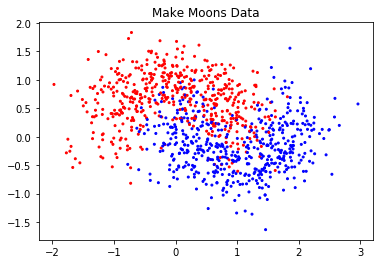

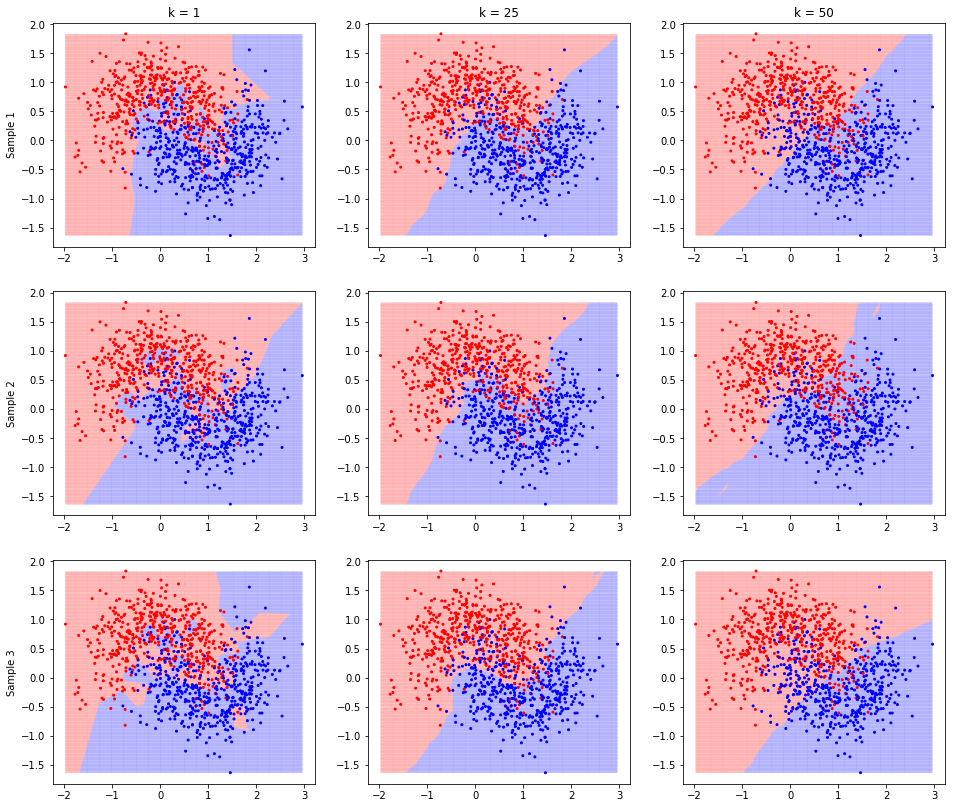

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier

# Create color maps for visualization
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
h=0.01 # define step size for decision boundary calcs 
kindex = [1,25,50] # define vector of k vals

# Create moons dataset
[samples, classifier] = make_moons(n_samples=1000, noise=0.35)
# Combine to form dataframe
samp_train = pd.DataFrame(np.concatenate((samples,classifier[:,None]), axis=1), columns=['x1','x2','class'])

# Create 2D meshgrid for decision boundary calculations
xx1, xx2 = np.meshgrid(np.arange(samp_train['x1'].min(), samp_train['x1'].max(), h),
                     np.arange(samp_train['x2'].min(), samp_train['x2'].max(), h))

# Take first subset of 100
sub = samp_train.sample(100)

neigh = KNeighborsClassifier(n_neighbors=(1)) # Create first KNN object with k=1
neigh.fit(sub.iloc[:,[0,1]], sub.iloc[:,2]) # Fit first model using subset
# Initialize C array containing predictions
C = neigh.predict(np.c_[xx1.ravel(), xx2.ravel()]) # Predict class for entire 2D space using first subset and k=1
for i in range(1,9): # Repeat 8 more times
    if i%3  == 0: # Create a new subset every 3rd time
        sub = samp_train.sample(100)
    neigh = KNeighborsClassifier(n_neighbors=(kindex[i%3])) # KNN object with k cycling through kindex array
    neigh.fit(sub.iloc[:,[0,1]], sub.iloc[:,2]) # Fit subset
    C = np.vstack((C, neigh.predict(np.c_[xx1.ravel(), xx2.ravel()]))) # Predict across 2D space and stack array with itself

    
# Title Vectors
stitle = ['Sample 1','Sample 2','Sample 3']
ktitle = ['k = 1', 'k = 25', 'k = 50']


# Plotting
plt.scatter(samples[:,0],samples[:,1], c=classifier, cmap=cmap_bold, s=4) # Scatterplot all the data
plt.title('Make Moons Data')
plt.show()
# Create 3x3 Plot
fig, axes = plt.subplots(figsize=(16,14), nrows=3, ncols=3)
# Cycle 9 times
for ax, i in zip(axes.flat[0:], range(0,9)):
    # Plot decision boundary, going down each row of C
    ax.pcolormesh(xx1, xx2, C[i,:].reshape(xx1.shape), cmap=cmap_light, alpha=0.2) 
    ax.scatter(samples[:,0],samples[:,1], c=classifier, cmap=cmap_bold, s=4) # Scatterplot all the data
    if i%3 == 0: # Title each row
        ax.set(ylabel=stitle[int(i/3)])
    if i<3: # Title each column
        ax.set_title(ktitle[i])

plt.show()





**ANSWER**

**(e)** Across the columns, as k increases the decision boundary becomes less flexible. Across the rows, the decision boundaries vary slightly, but more so with lower k values. The $k=25$ boundaries seem to separate the data the best, as it is a good middle ground regarding flexibility. 

**(f)** The bias-variance tradeoff is very clear in this example. Looking at $k=1$, this classifier has high variance, since changing the sample changes the decision boundary significantly. On the other side, $k=50$ has high bias, since the boundary does not capture the moon shape accurately. Therefore, $k=25$ attempts to limit both bias and variance by being in the middle in terms of flexibility. 

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...,500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

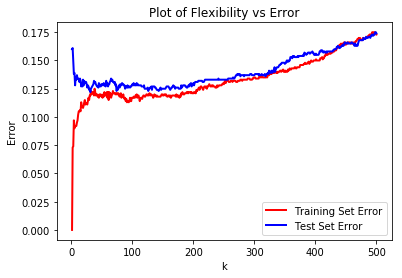

In [140]:
train = samp_train # Define training data

# Create test dataframe
[samples, classifier] = make_moons(n_samples=1000, noise=0.35)
test = pd.DataFrame(np.concatenate((samples,classifier[:,None]), axis=1), columns=['x1','x2','class'])

# Initialize accuracy for test and train data variables
a_train = np.array([])
a_test = np.array([])
# Repeat 500 times
for i in range(1,501):
    neigh = KNeighborsClassifier(n_neighbors=(i)) # Create KNN object with k=i
    neigh.fit(train.iloc[:,[0,1]], train.iloc[:,2])  # Fit to the training data
    train_predict = neigh.predict(train.iloc[:,[0,1]]) # Predict the training data
    test_predict = neigh.predict(test.iloc[:,[0,1]]) # Predict the test data
    # Create accuracy vectors
    a_train = np.append(a_train,accuracy(train.iloc[:,2],train_predict)) # Calculate accuracy of training prediction
    a_test = np.append(a_test,accuracy(test.iloc[:,2],test_predict)) # Calculate accuracy of test predictions

# Plotting
# Plot 1-accuracy=error against 1:500 k
plt.plot(np.arange(1,501,1), 1-a_train, color='red', linewidth=2, label='Training Set Error') # Training error
plt.plot(np.arange(1,501,1), 1-a_test, color='blue', linewidth=2, label='Test Set Error' ) # Test error
plt.xlabel('k'), plt.ylabel('Error'), plt.title('Plot of Flexibility vs Error'), plt.legend()
plt.show()


**ANSWER**

**(c)** Looking at the training set error, it starts at 0 and increases dramatically with increasing k, leveling out somewhat and again increasing with k. This makes sense as with $k=1$, the trained classifier should predict every point in the training set 100% accurately. The test set error has the typical U-shaped curve corresponding to the bias-variance tradeoff. It starts off larger, drops with increasing k and then increases again. 

**(d)** Low k values represent high variance and high k values represent high bias.

**(e)** The ideal k value is around 25-75, as it has the least error given that it achieves an optimal balance between low bias and low variance. 

**(f)** In other models, the number of parameters usually determines the flexibility of the model. Adding more parameters will increase the flexibility as there are more things to modify.

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given a dataset below that is partitioned into a training and testing dataset. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** A linear model does not mean that non-linear relationships cannot be explored. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

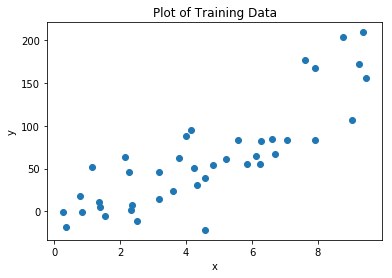

Linear, Train
R^2 = 0.701, MSE = 1052.585
Nonlinear, Train
R^2 = 0.752, MSE = 872.630


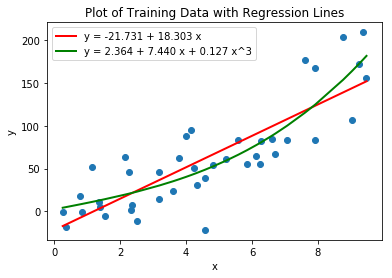

Linear, Test
R^2 = 0.556, MSE = 2023.312
Nonlinear, Test
R^2 = 0.683, MSE = 1442.951


In [159]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Data
x_train = [3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,6.26,6.62,1.53,6.25,7.93,7.07,4.58,4.14,2.14,9.04,4.56,3.99,6.71,2.51,0.84,6.13,5.22,0.25,3.60,1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,9.48,2.26,0.77,4.33]
y_train = [46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,8.01,82.35,84.84,-5.59,54.96,167.17,83.09,-21.63,94.64,63.97,106.57,38.99,88.26,66.99,-11.12,-0.44,65.08,61.47,-0.61,23.85,10.55,83.69,54.35,51.82,-18.63,1.98,4.90,55.44,50.09,155.66,45.57,18.12,30.58]

x_test = [5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]
y_test = [98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13]

# Regr object
regr = linear_model.LinearRegression()
regr.fit(np.array(x_train).reshape(-1,1),y_train) # Fit the simple linear regression to the training data
regr_pred_train = regr.predict(np.array(x_train).reshape(-1,1)) # Predict the training data using the regression
regr_pred_test = regr.predict(np.array(x_test).reshape(-1,1)) # Predict the test data using the regression

lcoef = [regr.intercept_, regr.coef_[0]] # Get the linear coefficients+intercept
# Calculate R^2 of training prediction
R2_train = regr.score(np.array(x_train).reshape(-1,1),y_train)
R2_train2 = r2_score(y_train,regr_pred_train)
# Calculate MSE of training prediction
MSE_train = mean_squared_error(y_train,regr_pred_train)
# Calculate R^2 of test prediction
R2_test = r2_score(y_test,regr_pred_test)
# Calculate MSE of test prediction
MSE_test = mean_squared_error(y_test,regr_pred_test)

# Plot Training Data
plt.scatter(x_train,y_train)
plt.xlabel('x'), plt.ylabel('y'), plt.title('Plot of Training Data')
plt.show()

# Print Linear regression equation and training R^2, MSE
print('Linear, Train')
leq = 'y = {0:3.3f} + {1:3.3f} x'.format(lcoef[0], lcoef[1])
print('R^2 = {0:3.3f}, MSE = {1:3.3f}'.format(R2_train, MSE_train))

# Multiple Regression
x_train_2 = np.power(x_train,3) # Create 2nd predictor (x^3)
x_test_2 = np.power(x_test,3) # 2nd predictor test vals
# Make a big X array
X_train_multi = np.transpose(np.array([x_train,x_train_2]))
X_test_multi = np.transpose(np.array([x_test,x_test_2]))

regr.fit(X_train_multi,y_train) # Fit nonlinear regression
regr_pred_train_multi = regr.predict(X_train_multi) # Predict training data
regr_pred_test_multi = regr.predict(X_test_multi) # Predict test data

mcoef = [regr.intercept_, regr.coef_[0], regr.coef_[1]] # Get nonlinear coeffs
# R^2 training calcs
R2_train_multi = regr.score(X_train_multi,y_train) 
R2_train_multi2 = r2_score(y_train,regr_pred_train_multi)
# MSE train calc
MSE_train_multi = mean_squared_error(y_train,regr_pred_train_multi)
# R^2 test
R2_test_multi = r2_score(y_test,regr_pred_test_multi)
# MSE test
MSE_test_multi = mean_squared_error(y_test,regr_pred_test_multi)

# Print nonlinear regression and training R^2 and MSE
print('Nonlinear, Train')
nleq = 'y = {0:3.3f} + {1:3.3f} x + {2:3.3f} x^3'.format(mcoef[0], mcoef[1], mcoef[2])
print('R^2 = {0:3.3f}, MSE = {1:3.3f}'.format(R2_train_multi, MSE_train_multi))

# Plot original training data and linear and nonlinear regressions
plt.scatter(x_train,y_train)
plt.plot(np.sort(x_train), np.sort(regr_pred_train), color='red', linewidth=2, label=leq)
plt.plot(np.sort(x_train), np.sort(regr_pred_train_multi), color='green', linewidth=2, label=nleq)
plt.xlabel('x'), plt.ylabel('y'), plt.title('Plot of Training Data with Regression Lines'), plt.legend()
plt.show()

# Print linear and nonlinear test R^2 and MSE
print('Linear, Test')
print('R^2 = {0:3.3f}, MSE = {1:3.3f}'.format(R2_test, MSE_test))
print('Nonlinear, Test')
print('R^2 = {0:3.3f}, MSE = {1:3.3f}'.format(R2_test_multi, MSE_test_multi))



**ANSWER**

**(f)** The nonlinear model performs better on both the test and training data, given the lower MSE and higher $R^2$ values. This is because the increased flexibility fits the training data better without overfitting yet. 

**(g)** If the test data was significantly different than the training data, it would very likely limit the predictive capabilities. Since the model relies on the training data to model the test data, the test data should be similar to the training data. In fact, there is a chance the linear model could perform better than a more flexible model on the test data if it was different, since the flexible data may have been overfit. 

In [ ]:
# Plot original training data and linear and nonlinear regressions
plt.scatter(x_train,y_train)
plt.plot(np.sort(x_train), np.sort(regr_pred_train), color='red', linewidth=2, label=leq)
plt.plot(np.sort(x_train), np.sort(regr_pred_train_multi), color='green', linewidth=2, label=nleq)
plt.xlabel('x'), plt.ylabel('y'), plt.title('Plot of Training Data with Regression Lines'), plt.legend()
plt.show()

# Print linear and nonlinear test R^2 and MSE
print('Linear, Test')
print('R^2 = {0:3.3f}, MSE = {1:3.3f}'.format(R2_test, MSE_test))
print('Nonlinear, Test')
print('R^2 = {0:3.3f}, MSE = {1:3.3f}'.format(R2_test_multi, MSE_test_multi))